<a href="https://colab.research.google.com/github/Aslam1903117/Titanic-Survival-Analysis-An-Exploratory-Data-Analysis-Journey/blob/main/Titanic_dataset_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
titanic=pd.read_csv('/content/Titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#finding Null values
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#handaling missing values

#For age column
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

#For cabin column we can creat a new feature saying weather a cabin is missing
titanic['CabinMissing'] = titanic['Cabin'].isnull().astype(int)

#for embared we can fill it with the most common value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)



<ipython-input-5-07548bc6bd9f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
<ipython-input-5-07548bc6bd9f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinMissing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
#checking duplicate values
titanic.duplicated().sum()

0

In [ ]:
#Adjust Data Types
# 'Survived', 'Pclass', 'SibSp', and 'Parch' should be categorical
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['SibSp'] = titanic['SibSp'].astype('category')
titanic['Parch'] = titanic['Parch'].astype('category')

# 'Sex' and 'Embarked' are already categorical, but let's ensure they are
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [ ]:
# Check the updated data types
print(titanic.dtypes)

PassengerId        int64
Survived        category
Pclass          category
Name              object
Sex             category
Age              float64
SibSp           category
Parch           category
Ticket            object
Fare             float64
Cabin             object
Embarked        category
CabinMissing       int64
dtype: object


In [ ]:
#descriptive statistics
titanic.describe()

,PassengerId,Age,Fare,CabinMissing
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,32.204208,0.771044
std,257.353842,13.019697,49.693429,0.420397
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,22.000000,7.910400,1.000000
50%,446.000000,28.000000,14.454200,1.000000
75%,668.500000,35.000000,31.000000,1.000000
max,891.000000,80.000000,512.329200,1.000000


In [ ]:
#Survival rate
titanic['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


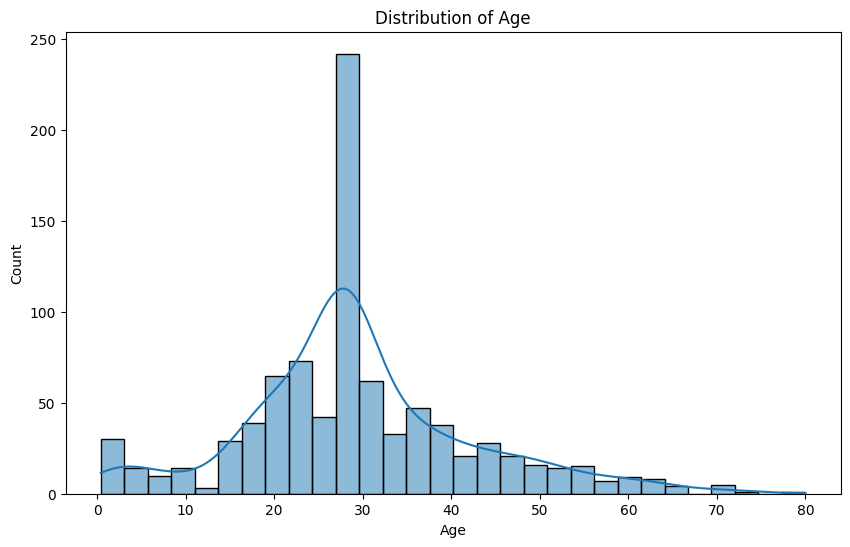

In [ ]:
#Data visualization
plt.figure(figsize=(10,6))
sns.histplot(data=titanic,x='Age',kde=True)
plt.title('Distribution of Age')
plt.show()

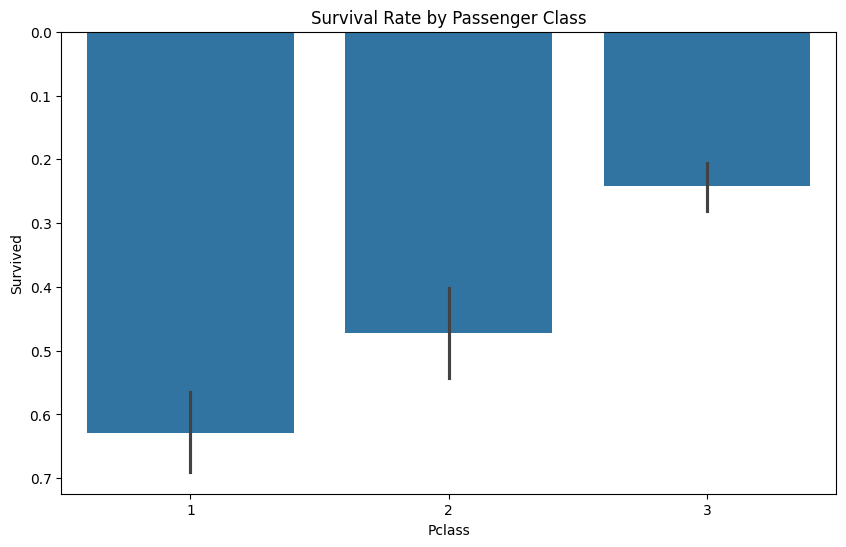

In [ ]:
# Survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

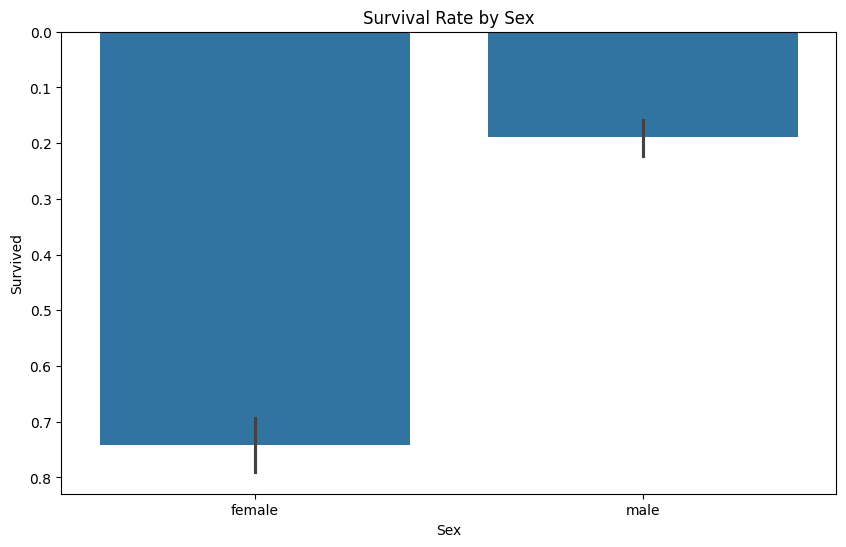

In [ ]:
# Survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

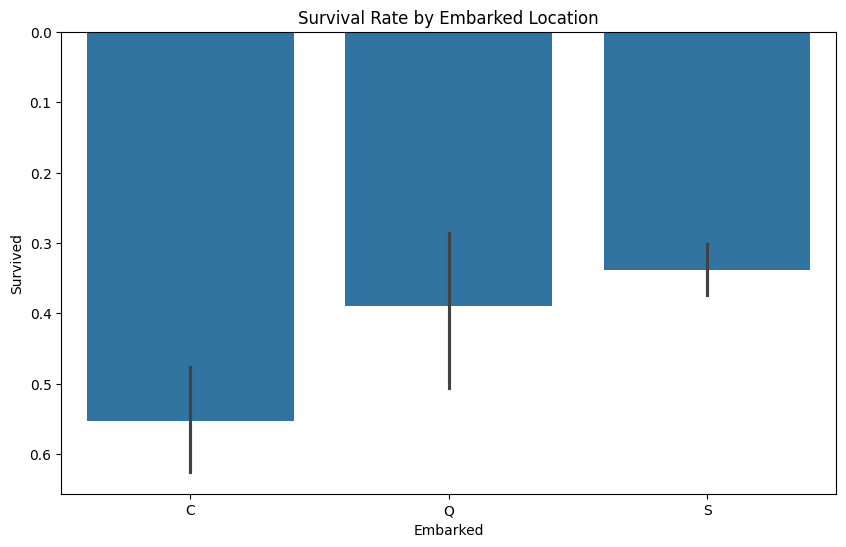

In [ ]:
# Survival rate by embarked location
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked Location')
plt.show()

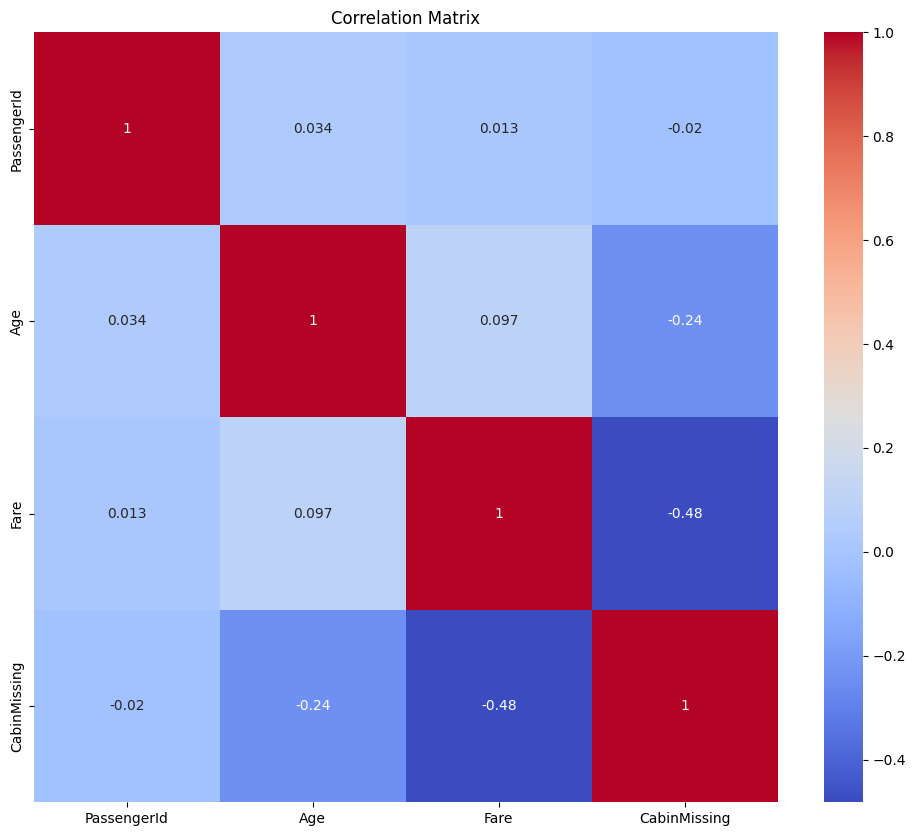

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

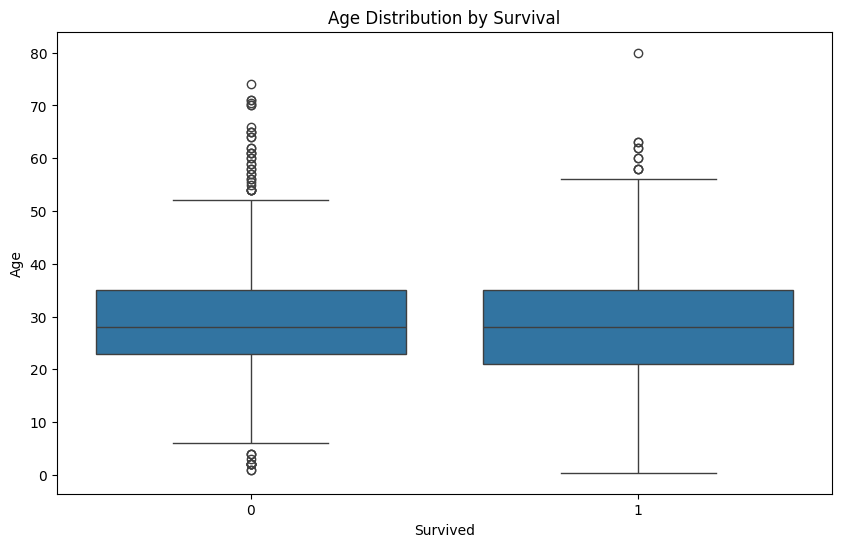

In [ ]:
# Box plot of age by survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()

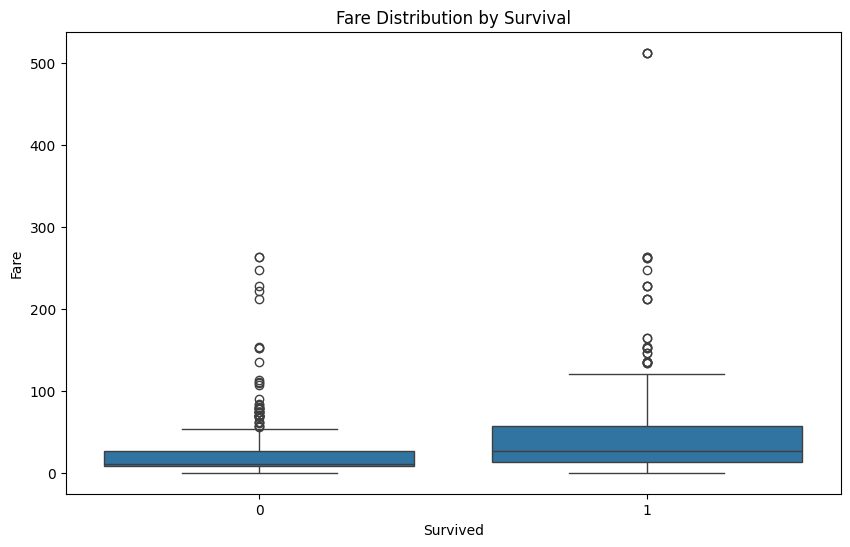

In [ ]:
# Box plot of fare by survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.show()

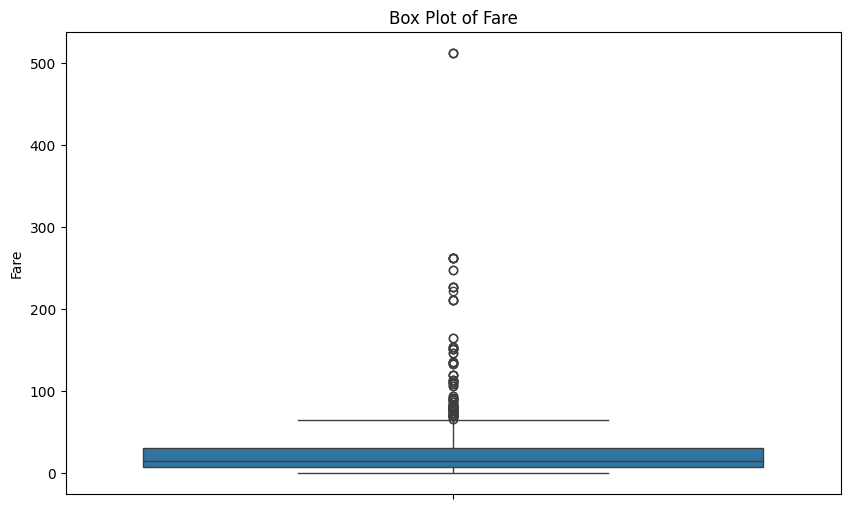

In [ ]:
#identify outliers in'fare'
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, y='Fare')
plt.title('Box Plot of Fare')
plt.show()


In [ ]:
# Calculate IQR for 'Fare'
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
print(f'Number of outliers in Fare: {len(outliers)}')

Number of outliers in Fare: 116


In [ ]:
# Handle outliers (e.g., cap them at the upper bound)
titanic['Fare'] = np.where(titanic['Fare'] > upper_bound, upper_bound, titanic['Fare'])

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinMissing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


Starting Feature Engineering

In [ ]:
# Convert 'SibSp' and 'Parch' back to numeric types
titanic['SibSp'] = titanic['SibSp'].astype(int)
titanic['Parch'] = titanic['Parch'].astype(int)

# Create 'FamilySize' by combining 'SibSp' and 'Parch'
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # +1 to include the passenger themselves

# Create 'IsAlone' to indicate if a passenger traveled alone
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

In [ ]:
# Title conversion
# Extract 'Title' from the 'Name' column
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles into 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic['Title'] = titanic['Title'].replace(rare_titles, 'Rare')

# Simplify titles
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

# Convert 'Title' to categorical
titanic['Title'] = titanic['Title'].astype('category')

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinMissing,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,1,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,4,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,Mr


In [ ]:
# Create 'AgeGroup' to categorize age into groups
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Create 'FarePerPerson' to account for fare per family member
titanic['FarePerPerson'] = titanic['Fare'] / titanic['FamilySize']


In [ ]:
titanic[['FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FarePerPerson']].head()

,FamilySize,IsAlone,Title,AgeGroup,FarePerPerson
0,2,0,Mr,Young Adult,3.6250
1,2,0,Mrs,Adult,32.8172
2,1,1,Miss,Young Adult,7.9250
3,2,0,Mrs,Adult,26.5500
4,1,1,Mr,Adult,8.0500


In [ ]:
# Log-transform 'Fare' to handle skewness
titanic['LogFare'] = np.log1p(titanic['Fare'])

# Log-transform 'FarePerPerson' to handle skewness
titanic['LogFarePerPerson'] = np.log1p(titanic['FarePerPerson'])

Text(0.5, 1.0, 'Distribution of Fare')

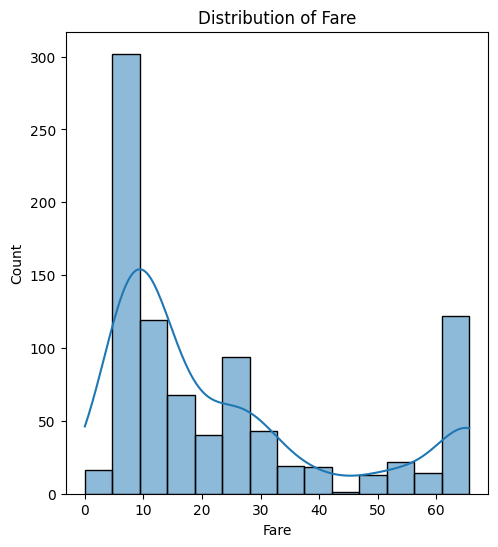

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=titanic, x='Fare', kde=True)
plt.title('Distribution of Fare')

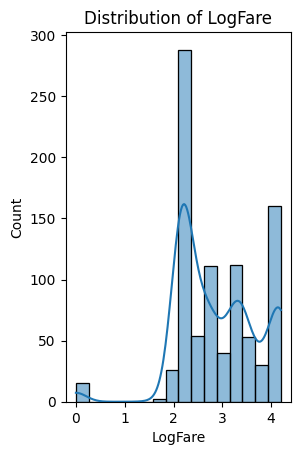

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data=titanic, x='LogFare', kde=True)
plt.title('Distribution of LogFare')
plt.show()

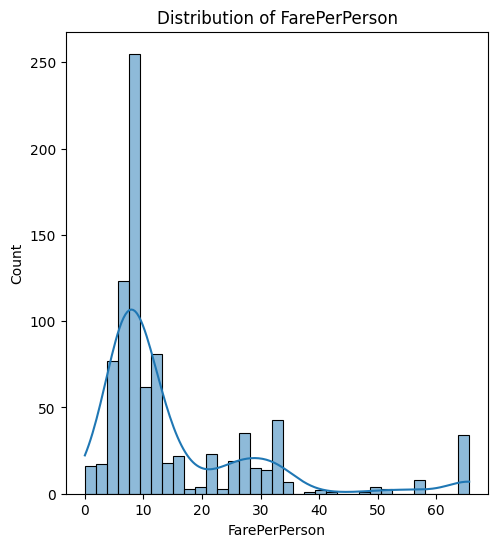

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=titanic, x='FarePerPerson', kde=True)
plt.title('Distribution of FarePerPerson')
plt.show()

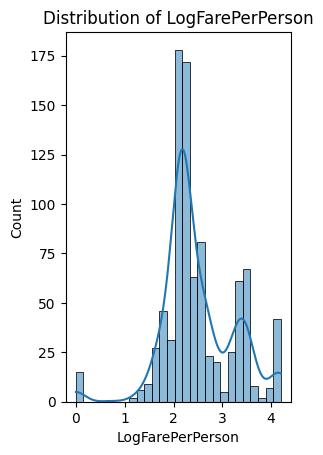

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data=titanic, x='LogFarePerPerson', kde=True)
plt.title('Distribution of LogFarePerPerson')
plt.show()

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinMissing,FamilySize,IsAlone,Title,AgeGroup,FarePerPerson,LogFare,LogFarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,Mr,Young Adult,3.6250,2.110213,1.531476
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,0,2,0,Mrs,Adult,32.8172,4.199221,3.520970
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss,Young Adult,7.9250,2.188856,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,Mrs,Adult,26.5500,3.990834,3.316003
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,Mr,Adult,8.0500,2.202765,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,1,Rare,Young Adult,13.0000,2.639057,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,1,Miss,Young Adult,30.0000,3.433987,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,4,0,Miss,Young Adult,5.8625,3.196630,1.926072
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,Mr,Young Adult,30.0000,3.433987,3.433987


In [ ]:
# One-hot encode 'Sex', 'Embarked', 'Pclass', 'Title', and 'AgeGroup'
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass', 'Title', 'AgeGroup'], drop_first=True)

# Check the encoded dataset
titanic_encoded.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinMissing,...,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,...,False,True,False,True,False,False,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,65.6344,C85,0,...,False,False,False,False,True,False,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,False,True,True,False,False,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,False,False,False,False,True,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,...,False,True,False,True,False,False,False,False,True,False


Parameter Estimation

In [ ]:
#Prepare the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = titanic_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

# Display the coefficients
print(coef_df)

                 Feature  Coefficient
16              Title_Mr    -1.855001
17             Title_Mrs     1.319819
18            Title_Rare    -1.164979
4           CabinMissing    -1.044784
13              Pclass_2     0.578125
10              Sex_male    -0.552036
2                  Parch    -0.520557
1                  SibSp    -0.510680
8                LogFare     0.475422
20  AgeGroup_Young Adult    -0.431382
12            Embarked_S    -0.379824
6                IsAlone     0.347377
14              Pclass_3    -0.158169
15            Title_Miss     0.144553
22       AgeGroup_Senior     0.133184
19         AgeGroup_Teen    -0.127332
21        AgeGroup_Adult    -0.109307
9       LogFarePerPerson     0.092277
11            Embarked_Q     0.055312
5             FamilySize     0.041011
0                    Age    -0.034358
3                   Fare     0.014930
7          FarePerPerson    -0.011441


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Display the coefficients again for interpretation
print(coef_df)

# Calculate the odds ratios
odds_ratios = np.exp(coefficients)
odds_ratio_df = pd.DataFrame({'Feature': feature_names, 'Odds Ratio': odds_ratios})
odds_ratio_df = odds_ratio_df.sort_values('Odds Ratio', key=abs, ascending=False)

# Display the odds ratios
print(odds_ratio_df)

                 Feature  Coefficient
16              Title_Mr    -1.855001
17             Title_Mrs     1.319819
18            Title_Rare    -1.164979
4           CabinMissing    -1.044784
13              Pclass_2     0.578125
10              Sex_male    -0.552036
2                  Parch    -0.520557
1                  SibSp    -0.510680
8                LogFare     0.475422
20  AgeGroup_Young Adult    -0.431382
12            Embarked_S    -0.379824
6                IsAlone     0.347377
14              Pclass_3    -0.158169
15            Title_Miss     0.144553
22       AgeGroup_Senior     0.133184
19         AgeGroup_Teen    -0.127332
21        AgeGroup_Adult    -0.109307
9       LogFarePerPerson     0.092277
11            Embarked_Q     0.055312
5             FamilySize     0.041011
0                    Age    -0.034358
3                   Fare     0.014930
7          FarePerPerson    -0.011441
                 Feature  Odds Ratio
17             Title_Mrs    3.742742
13            

# Inference and Hypothesis testing

In [ ]:
import scipy.stats as stats

# Hypothesis 1: Passengers in first class had a higher survival rate than those in third class.
first_class_survival = titanic[titanic['Pclass'] == 1]['Survived']
third_class_survival = titanic[titanic['Pclass'] == 3]['Survived']

chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(titanic['Pclass'], titanic['Survived']))
print(f'Hypothesis 1: Chi-square statistic = {chi2:.4f}, p-value = {p_value:.4f}')


Hypothesis 1: Chi-square statistic = 102.8890, p-value = 0.0000


In [ ]:
# Hypothesis 2: Women had a higher survival rate than men.
female_survival = titanic[titanic['Sex'] == 'female']['Survived']
male_survival = titanic[titanic['Sex'] == 'male']['Survived']

chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(titanic['Sex'], titanic['Survived']))
print(f'Hypothesis 2: Chi-square statistic = {chi2:.4f}, p-value = {p_value:.4f}')

Hypothesis 2: Chi-square statistic = 260.7170, p-value = 0.0000


In [ ]:

# Hypothesis 3: Passengers who embarked at Cherbourg had a higher survival rate than those who embarked at other ports.
cherbourg_survival = titanic[titanic['Embarked'] == 'C']['Survived']
other_survival = titanic[titanic['Embarked'] != 'C']['Survived']

chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(titanic['Embarked'], titanic['Survived']))
print(f'Hypothesis 3: Chi-square statistic = {chi2:.4f}, p-value = {p_value:.4f}')

Hypothesis 3: Chi-square statistic = 25.9645, p-value = 0.0000


In [ ]:
# Hypothesis 4: Passengers with larger families had a lower survival rate than those traveling alone.
alone_survival = titanic[titanic['IsAlone'] == 1]['Survived']
not_alone_survival = titanic[titanic['IsAlone'] == 0]['Survived']

chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(titanic['IsAlone'], titanic['Survived']))
print(f'Hypothesis 4: Chi-square statistic = {chi2:.4f}, p-value = {p_value:.4f}')

Hypothesis 4: Chi-square statistic = 36.0005, p-value = 0.0000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Calculate the standard errors
# We need to convert X_train to a numpy array of floats
X_train_array = X_train.to_numpy().astype(float)

# Calculate the covariance matrix of the coefficients
cov_matrix = np.linalg.inv(np.dot(X_train_array.T, X_train_array))

# Get the standard errors
standard_error = np.sqrt(np.diag(cov_matrix))

# Calculate the z-scores for 95% confidence interval
z_score = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the confidence intervals
confidence_intervals = []
for coef, se in zip(model.coef_[0], standard_error):
    lower = coef - z_score * se
    upper = coef + z_score * se
    confidence_intervals.append((lower, upper))

# Create a DataFrame to display the confidence intervals
feature_names = X.columns
ci_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0], 'Lower CI': [ci[0] for ci in confidence_intervals], 'Upper CI': [ci[1] for ci in confidence_intervals]})
ci_df = ci_df.sort_values('Coefficient', key=abs, ascending=False)

# Display the confidence intervals
print(ci_df)

                 Feature  Coefficient  Lower CI  Upper CI
16              Title_Mr    -1.855001 -2.378680 -1.331321
17             Title_Mrs     1.319819 -0.282309  2.921946
18            Title_Rare    -1.164979 -1.906866 -0.423092
4           CabinMissing    -1.044784 -1.347447 -0.742121
13              Pclass_2     0.578125  0.174844  0.981407
10              Sex_male    -0.552036 -2.051654  0.947582
2                  Parch    -0.520557 -2.229032  1.187918
1                  SibSp    -0.510680 -2.234483  1.213124
8                LogFare     0.475422 -0.842340  1.793184
20  AgeGroup_Young Adult    -0.431382 -0.981133  0.118370
12            Embarked_S    -0.379824 -0.586765 -0.172883
6                IsAlone     0.347377 -0.318686  1.013441
14              Pclass_3    -0.158169 -0.585132  0.268794
15            Title_Miss     0.144553 -1.431367  1.720473
22       AgeGroup_Senior     0.133184 -0.875832  1.142200
19         AgeGroup_Teen    -0.127332 -0.678961  0.424297
21        AgeG

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
